Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Genome size = 4641652

Red points are for G content, blue for C content.


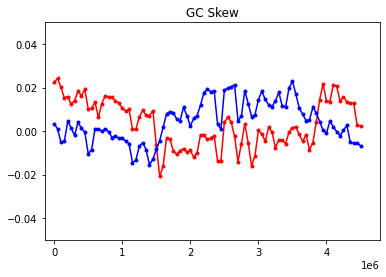

In [10]:
"""SLIDING WINDOW mechanism for search for genomic patterns. This version looks 
for gc-skew across the genome.  But you can look for other patterns by changing the 
set1 and set2 values on lines 9 and 10 (or thereabouts)
"""
plottype = 'lines' # 'acr', 'lines', 'points'
windowsize = 100000
genomestart = 0  
genomeend   = 4639675
set1 = ('g')
set2 = ('c')
import pandas as pd

# Read the Genbank file
genomeName = '/content/gdrive/Shared drives/2.Python/Genomics/Data Files/E.coli.K12.sequence.2.gb'
#outfilename = 'G.' + str(windowstep) + '.whole.csv'
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
with open(genomeName, 'r') as f:
  data = f.read()
f.close()
txtfile = str(data)

#GET THE SEQUENCE  
split1 = txtfile.split('ORIGIN') #list[0] is annotations, [1] contains gene locations
split1[0] = ''

sequence = ''
for char in split1[1]:
    if char in ('t', 'g', 'c', 'a'):
        sequence += char
print()
print('Genome size =', len(sequence))   
print()
print('Red points are for G content, blue for C content.')    

x1, y1, y2 =[], [], []
    
for x in range(len(sequence) - windowsize): #genomeend - windowsize):# len(seq) - windowsize): 
    if x % round(windowsize/2) == 0:
        score1 =0 
        score2 =0
        x1.append(x)
        for y in range(windowsize): 
            if sequence[x+y] in set1:  score1 +=1
            if sequence[x+y] in set2: score2 +=1
        y1.append(score1  / windowsize -0.25)
        y2.append(score2  / windowsize -0.25)
        
# plotting routines:    
seqrange = genomeend - genomestart
xlo = genomestart - 0.03 * seqrange
xhi = genomeend + 0.03 * seqrange
if plottype == 'points':
    plt.scatter(x1, y1, color= 'r', marker= 'x')    
    plt.scatter(x1, y2, color= 'b' , marker= '+')
    plt.xlim(xlo, xhi)

if plottype == 'lines':
    plt.plot(x1, y1, color= 'r', marker= '.')   
    plt.plot(x1, y2, color= 'b' , marker= '.')
    plt.xlim(xlo, xhi)
    plt.ylim(-0.05, 0.05)
    plt.title('GC Skew')

if plottype == 'acr':
    df = pd.DataFrame()
    df['xvals1'] = x1
    df['yvals1'] = y1
    pd.plotting.autocorrelation_plot(df['yvals1'])           

plt.show()
